# Data preprocessing

## How to deal with NaN.

In [2]:
import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D,E,F
1.0, 2.0, 3.0, 4.0, 5.0, 6.0
5.0, 6.0,, 8.0,,
10.0, 11.0, 12.0,,13.0,
13.0, 5.0, 4.0, 9.0, 11.0, 6.0
11.0,,,, 18.0, 7.0
21.0, 8.0, 22.0, 7.0,, 1.0
'''

In [3]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,6.0
1,5.0,6.0,NaN,8.0,NaN,NaN
2,10.0,11.0,12.0,NaN,13.0,NaN
3,13.0,5.0,4.0,9.0,11.0,6.0
4,11.0,NaN,NaN,NaN,18.0,7.0
5,21.0,8.0,22.0,7.0,NaN,1.0


In [4]:
df.isnull().sum() # count number of NAN

A    0
B    1
C    2
D    2
E    2
F    2
dtype: int64

## Delete raws or colounms if NAN exist.

In [5]:
df.dropna(axis=0) # Delete raws which contains NAN. df.dropna() is also OK.

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,6.0
3,13.0,5.0,4.0,9.0,11.0,6.0


In [6]:
df.dropna(axis=1) # Delete coloums which contains NAN.

,A
0,1.0
1,5.0
2,10.0
3,13.0
4,11.0
5,21.0


In [7]:
df.dropna(how='all') # Delete raws if all of number of the raws are NAN

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,6.0
1,5.0,6.0,NaN,8.0,NaN,NaN
2,10.0,11.0,12.0,NaN,13.0,NaN
3,13.0,5.0,4.0,9.0,11.0,6.0
4,11.0,NaN,NaN,NaN,18.0,7.0
5,21.0,8.0,22.0,7.0,NaN,1.0


In [8]:
df.dropna(thresh=4) #Delete raws if number of non-NAN is less than 4 in the raws.

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,6.0
2,10.0,11.0,12.0,NaN,13.0,NaN
3,13.0,5.0,4.0,9.0,11.0,6.0
5,21.0,8.0,22.0,7.0,NaN,1.0


In [9]:
df.dropna(subset=['C']) # Delete raws if NAN exist in the column C.

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,6.0
2,10.0,11.0,12.0,NaN,13.0,NaN
3,13.0,5.0,4.0,9.0,11.0,6.0
5,21.0,8.0,22.0,7.0,NaN,1.0


## Imputation of NAN.

In [10]:
df

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,6.0
1,5.0,6.0,NaN,8.0,NaN,NaN
2,10.0,11.0,12.0,NaN,13.0,NaN
3,13.0,5.0,4.0,9.0,11.0,6.0
4,11.0,NaN,NaN,NaN,18.0,7.0
5,21.0,8.0,22.0,7.0,NaN,1.0


In [11]:
from sklearn.preprocessing import Imputer

### Mean imputation with column-direction

In [12]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0) # mean imputation column-direction
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1.  ,   2.  ,   3.  ,   4.  ,   5.  ,   6.  ],
       [  5.  ,   6.  ,  10.25,   8.  ,  11.75,   5.  ],
       [ 10.  ,  11.  ,  12.  ,   7.  ,  13.  ,   5.  ],
       [ 13.  ,   5.  ,   4.  ,   9.  ,  11.  ,   6.  ],
       [ 11.  ,   6.4 ,  10.25,   7.  ,  18.  ,   7.  ],
       [ 21.  ,   8.  ,  22.  ,   7.  ,  11.75,   1.  ]])

### Mean imputation with raw-direction

In [13]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=1)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1.        ,   2.        ,   3.        ,   4.        ,
          5.        ,   6.        ],
       [  5.        ,   6.        ,   6.33333333,   8.        ,
          6.33333333,   6.33333333],
       [ 10.        ,  11.        ,  12.        ,  11.5       ,
         13.        ,  11.5       ],
       [ 13.        ,   5.        ,   4.        ,   9.        ,
         11.        ,   6.        ],
       [ 11.        ,  12.        ,  12.        ,  12.        ,
         18.        ,   7.        ],
       [ 21.        ,   8.        ,  22.        ,   7.        ,
         11.8       ,   1.        ]])

### Median imputation with raw-direction

In [14]:
imr = Imputer(missing_values='NaN', strategy='median', axis=1)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ,   5. ,   6. ],
       [  5. ,   6. ,   6. ,   8. ,   6. ,   6. ],
       [ 10. ,  11. ,  12. ,  11.5,  13. ,  11.5],
       [ 13. ,   5. ,   4. ,   9. ,  11. ,   6. ],
       [ 11. ,  11. ,  11. ,  11. ,  18. ,   7. ],
       [ 21. ,   8. ,  22. ,   7. ,   8. ,   1. ]])

### Most frequent imputation with raw-direction

In [15]:
imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=1)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1.,   2.,   3.,   4.,   5.,   6.],
       [  5.,   6.,   5.,   8.,   5.,   5.],
       [ 10.,  11.,  12.,  10.,  13.,  10.],
       [ 13.,   5.,   4.,   9.,  11.,   6.],
       [ 11.,   7.,   7.,   7.,  18.,   7.],
       [ 21.,   8.,  22.,   7.,   1.,   1.]])

## How to deal with categorical variables?

In [69]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 9.2, 'class2'],
    ['blue', 'XL', 12.1, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,9.2,class2
2,blue,XL,12.1,class1


### Mapping of ordinal variables

In [57]:
size_mapping = {'XL': 3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,9.2,class2
2,blue,3,12.1,class1


In [53]:
inv_size_mapping =  {v: k for k, v in size_mapping.items()}
inv_size_mapping

{1: 'M', 2: 'L', 3: 'XL'}

In [54]:
df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,9.2,class2
2,blue,XL,12.1,class1


### Encoding of nominal variables

In [58]:
import numpy as np
np.unique(df['classlabel'])

array(['class1', 'class2'], dtype=object)

In [59]:
enumerate(np.unique(df['classlabel']))

In [60]:
#enumerate function yields the elements of an iterator, as well as an index number:
list1 = ['a', 'b', 'c']
for (i, x) in enumerate(list1):
    print(i,x)

0 a
1 b
2 c


In [61]:
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [62]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,9.2,1
2,blue,3,12.1,0


In [63]:
inv_class_mapping =  {v: k for k, v in class_mapping.items()}
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [64]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,9.2,class2
2,blue,3,12.1,class1


## Encoding nominal variables using LabelEncoder

In [65]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['classlabel'] = class_le.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,9.2,1
2,blue,3,12.1,0


## One-hot-encoding using OneHotEncoder

In [66]:
X = df[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 9.2],
       ['blue', 3, 12.1]], dtype=object)

In [67]:
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 9.2],
       [0, 3, 12.1]], dtype=object)

In [68]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,   9.2],
       [  1. ,   0. ,   0. ,   3. ,  12.1]])

## One-hot-encoding using pandas get_dummies

In [70]:
df
size_mapping = {'XL': 3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,9.2,class2
2,blue,3,12.1,class1


In [71]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,9.2,2,0,0,1
2,12.1,3,1,0,0


## Training set and Test set

In [72]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalunuty of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalunuty of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Feature scaling

### min-max scaling
$$
x_{norm}^{i} = \frac{x^{i} - x_{min}}{x_{max} - x_{min}}
$$

In [79]:
from sklearn.preprocessing import MinMaxScaler
nms = MinMaxScaler()
X_train_norm = nms.fit_transform(X_train)
X_test_norm = nms.fit_transform(X_test)

In [80]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

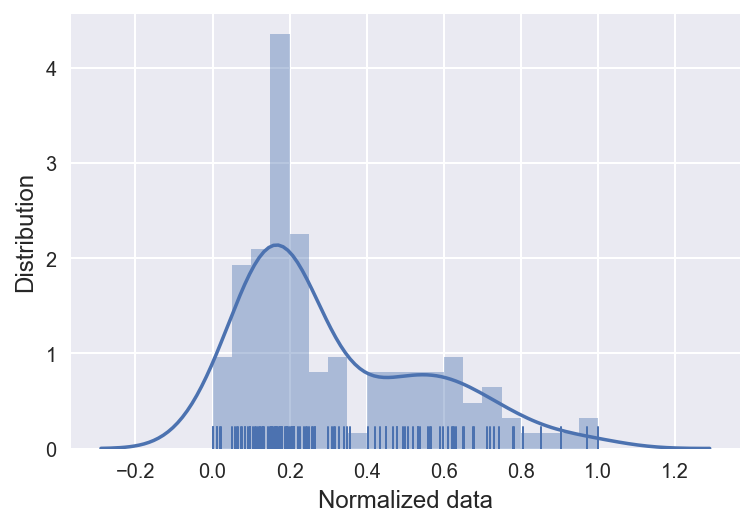

In [138]:
sns.distplot(X_train_norm[:, 1], bins=20, kde=True, rug=True)
plt.xlabel('Normalized data', fontsize=12)
plt.ylabel('Distribution', fontsize=12)

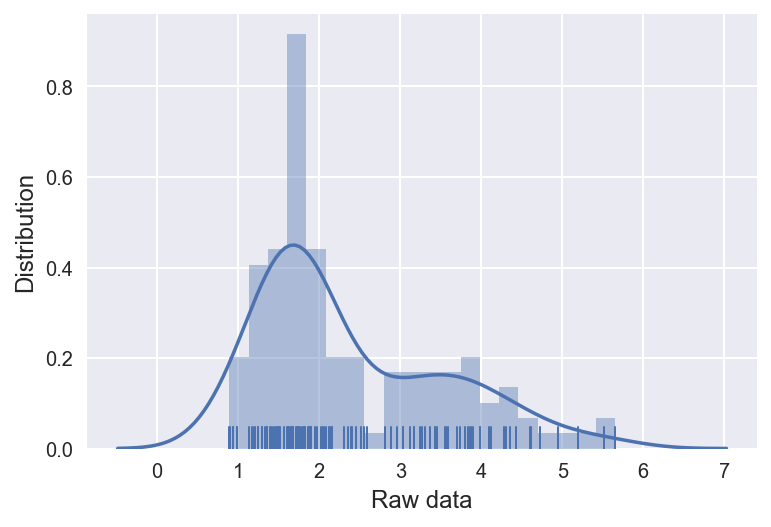

In [135]:
sns.distplot(X_train[:,1], bins=20, kde=True, rug=True)
plt.xlabel('Raw data', fontsize=12)
plt.ylabel('Distribution', fontsize=12)

### Standardization
$$
x_{std}^{i} = \frac{x^{i} - \bar{x}}{\sigma_x}
$$

In [137]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

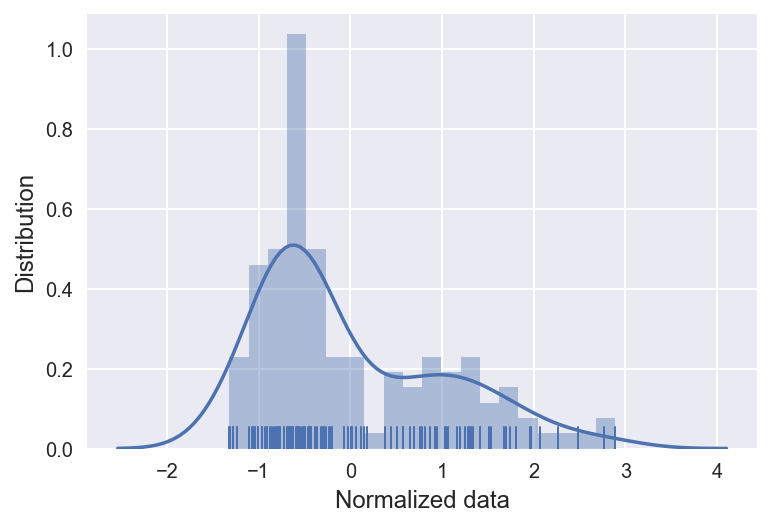

In [140]:
sns.distplot(X_train_std[:, 1], bins=20, kde=True, rug=True)
plt.xlabel('Normalized data', fontsize=12)
plt.ylabel('Distribution', fontsize=12)